Монтируем гугл-диск для более удобной работы

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Устанавливаем необходимую библиотеку для работы с YOLO

In [1]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 34.4 MB/s eta 0:00:00


Обучаем модель:

In [6]:
from ultralytics import YOLO

model = YOLO("/content/drive/MyDrive/yolov8s.pt")

results = model.train(
    data=r"/content/drive/MyDrive/tbank-logo-detector-v1/data.yaml",
    epochs=50,
    imgsz=640,
    batch=16,
    workers=4,
    device=0,
    pretrained=True,
    project="runs",
    name="baseline_yolov8s"
)


Ultralytics 8.3.200 🚀 Python-3.12.11 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/drive/MyDrive/tbank-logo-detector-v1/data.yaml, degrees=0.0, deterministic=True, device=0, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=50, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=/content/drive/MyDrive/yolov8s.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=baseline_yolov8s, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_ma

Еще раз смотрим на метрики и сохраняем их в переменную:

In [7]:
metrics = model.val()

Ultralytics 8.3.200 🚀 Python-3.12.11 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 11,125,971 parameters, 0 gradients, 28.4 GFLOPs
val: Fast image access ✅ (ping: 1.0±0.4 ms, read: 15.9±5.9 MB/s, size: 25.9 KB)
val: Scanning /content/drive/MyDrive/tbank-logo-detector-v1/valid/labels.cache... 431 images, 383 backgrounds, 0 corrupt: 100% ━━━━━━━━━━━━ 431/431 468.3Kit/s 0.0s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 27/27 3.2it/s 8.4s
                   all        431         51      0.977       0.98      0.994      0.867
Speed: 0.8ms preprocess, 10.4ms inference, 0.0ms loss, 2.5ms postprocess per image
Results saved to /content/runs/baseline_yolov8s2


### Проверяем работу модели на случайных картинках из интернета:

Изображение 1:


image 1/1 /content/test_image.jpeg: 640x640 1 tbank-logo, 694.0ms
Speed: 4.8ms preprocess, 694.0ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)
Results saved to /content/runs/detect/predict2


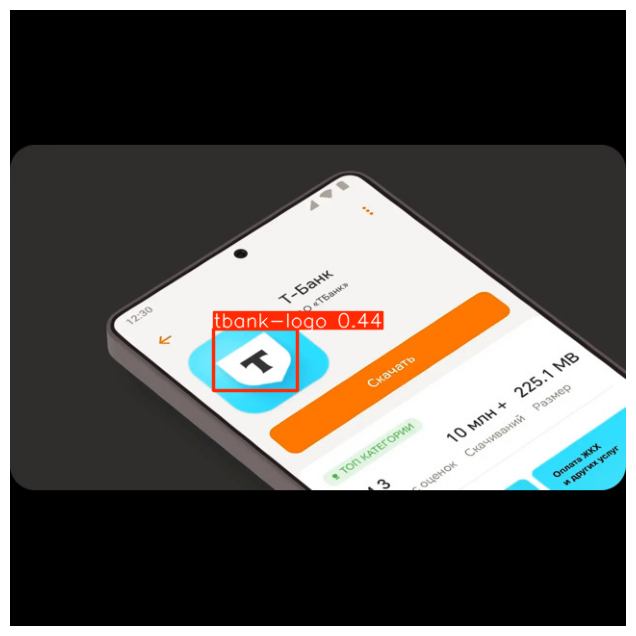

In [5]:
from ultralytics import YOLO
import matplotlib.pyplot as plt
model = YOLO("best.pt")
results = model.predict(source="test_image.jpeg", conf=0.25, save=True)
for r in results:
    im_array = r.plot()
    plt.figure(figsize=(8,8))
    plt.imshow(im_array)
    plt.axis("off")
    plt.show()

Изображение 2:


image 1/1 /content/new_test_image.png: 640x640 1 tbank-logo, 723.1ms
Speed: 4.7ms preprocess, 723.1ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)
Results saved to /content/runs/detect/predict2


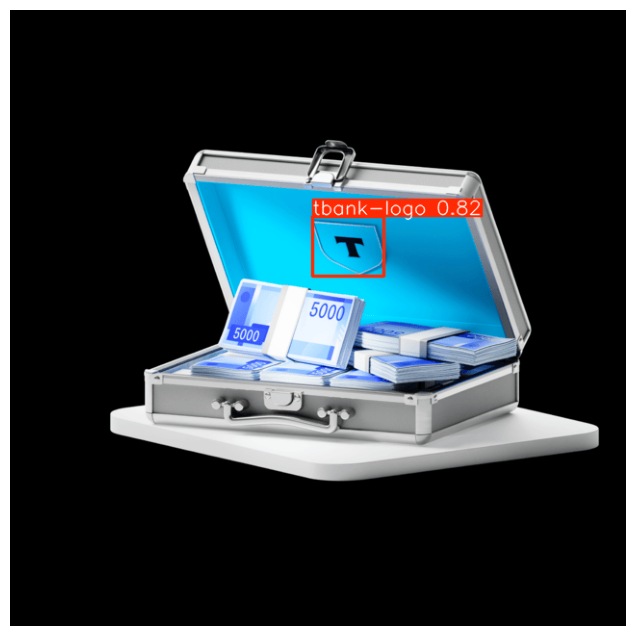

In [7]:
results = model.predict(source="new_test_image.png", conf=0.25, save=True)
for r in results:
    im_array = r.plot()
    plt.figure(figsize=(8,8))
    plt.imshow(im_array)
    plt.axis("off")
    plt.show()

Изображение 3:


image 1/1 /content/test_image_2.png: 640x640 3 tbank-logos, 754.0ms
Speed: 4.0ms preprocess, 754.0ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)
Results saved to /content/runs/detect/predict2


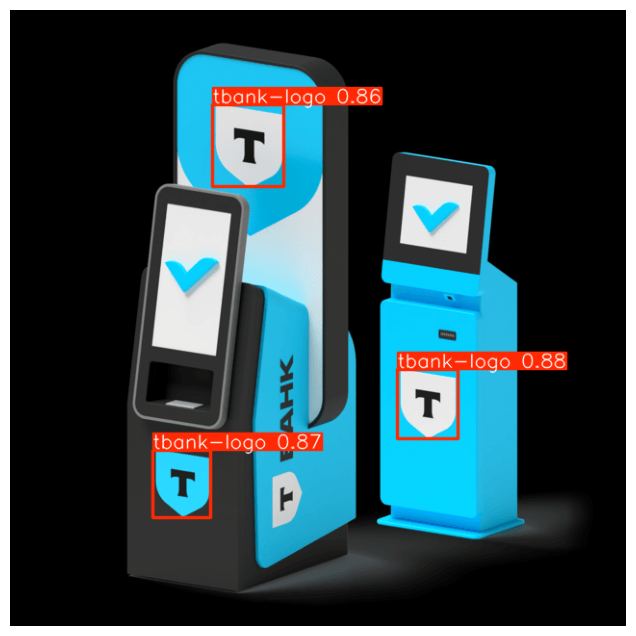

In [8]:
results = model.predict(source="test_image_2.png", conf=0.25, save=True)
for r in results:
    im_array = r.plot()
    plt.figure(figsize=(8,8))
    plt.imshow(im_array)
    plt.axis("off")
    plt.show()